<a href="https://colab.research.google.com/github/chitwan6804/Data_mining/blob/main/DescisionTrees_%26_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris=load_iris()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=0)

In [ ]:
dtc=DecisionTreeClassifier()

dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dtc.predict(X_test)

In [ ]:
accuracy=np.sum(y_pred==Y_test)/len(Y_test)
print("Accuracy:",accuracy)

Accuracy: 0.9777777777777777


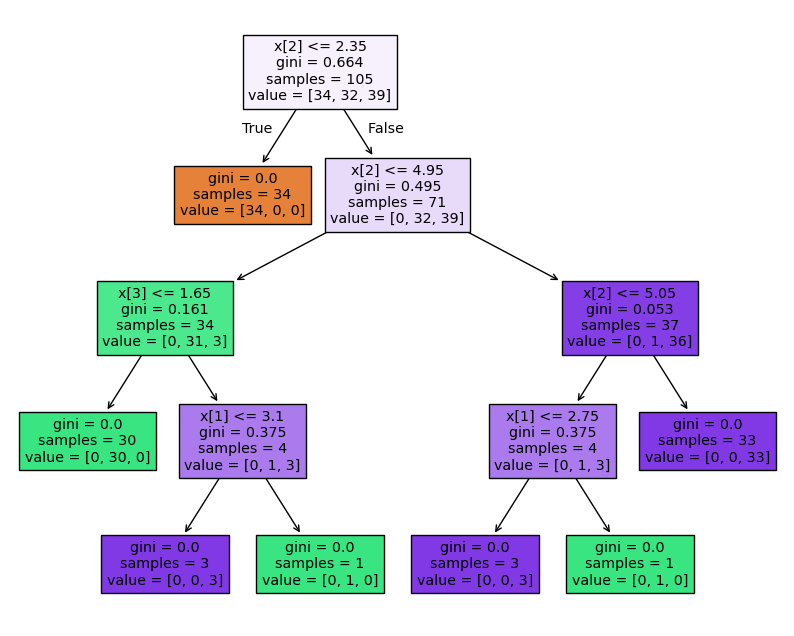

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(dtc,filled=True)
plt.show()

In [ ]:
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Decision Tree for own dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/lenses.txt"

with open(file_path, 'r') as f:
    content = f.read()

print(content)  # Prints the entire file content

young	myope	no	reduced	no lenses
young	myope	no	normal	soft
young	myope	yes	reduced	no lenses
young	myope	yes	normal	hard
young	hyper	no	reduced	no lenses
young	hyper	no	normal	soft
young	hyper	yes	reduced	no lenses
young	hyper	yes	normal	hard
pre	myope	no	reduced	no lenses
pre	myope	no	normal	soft
pre	myope	yes	reduced	no lenses
pre	myope	yes	normal	hard
pre	hyper	no	reduced	no lenses
pre	hyper	no	normal	soft
pre	hyper	yes	reduced	no lenses
pre	hyper	yes	normal	no lenses
presbyopic	myope	no	reduced	no lenses
presbyopic	myope	no	normal	no lenses
presbyopic	myope	yes	reduced	no lenses
presbyopic	myope	yes	normal	hard
presbyopic	hyper	no	reduced	no lenses
presbyopic	hyper	no	normal	soft
presbyopic	hyper	yes	reduced	no lenses
presbyopic	hyper	yes	normal	no lenses


In [ ]:
import pandas as pd

# Read space-separated data (auto-detect multiple spaces)
df = pd.read_csv(file_path, sep='\t', header=None)

# Add column names
df.columns = ['Age', 'Spectacle_Prescription', 'Astigmatism', 'Tear_Production_Rate', 'Class']

print(df.head())

     Age Spectacle_Prescription Astigmatism Tear_Production_Rate      Class
0  young                  myope          no              reduced  no lenses
1  young                  myope          no               normal       soft
2  young                  myope         yes              reduced  no lenses
3  young                  myope         yes               normal       hard
4  young                  hyper          no              reduced  no lenses


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to encode
df_encoded = df.copy()

# Encode categorical columns
for column in df_encoded.columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

print(df_encoded.head())

   Age  Spectacle_Prescription  Astigmatism  Tear_Production_Rate  Class
0    2                       1            0                     1      1
1    2                       1            0                     0      2
2    2                       1            1                     1      1
3    2                       1            1                     0      0
4    2                       0            0                     1      1


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoders = {}  # to store mappings

for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    encoders[column] = le  # save encoder for later

# Now, for example:
print("Mapping for 'Age':")
for i, cls in enumerate(encoders['Age'].classes_):
    print(f"{cls} -> {i}")

print("\nMapping for 'Spectacle_Prescription':")
for i, cls in enumerate(encoders['Spectacle_Prescription'].classes_):
    print(f"{cls} -> {i}")

print("\nMapping for 'Astigmatism':")
for i, cls in enumerate(encoders['Astigmatism'].classes_):
    print(f"{cls} -> {i}")

print("\nMapping for 'Tear_Production_Rate':")
for i, cls in enumerate(encoders['Tear_Production_Rate'].classes_):
    print(f"{cls} -> {i}")

print("\nMapping for 'Class':")
for i, cls in enumerate(encoders['Class'].classes_):
    print(f"{cls} -> {i}")

Mapping for 'Age':
pre -> 0
presbyopic -> 1
young -> 2

Mapping for 'Spectacle_Prescription':
hyper -> 0
myope -> 1

Mapping for 'Astigmatism':
no -> 0
yes -> 1

Mapping for 'Tear_Production_Rate':
normal -> 0
reduced -> 1

Mapping for 'Class':
hard -> 0
no lenses -> 1
soft -> 2


In [ ]:
# Features and target
X = df_encoded.drop('Class', axis=1)
y = df_encoded['Class']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_Pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_Pred))

Accuracy: 0.625


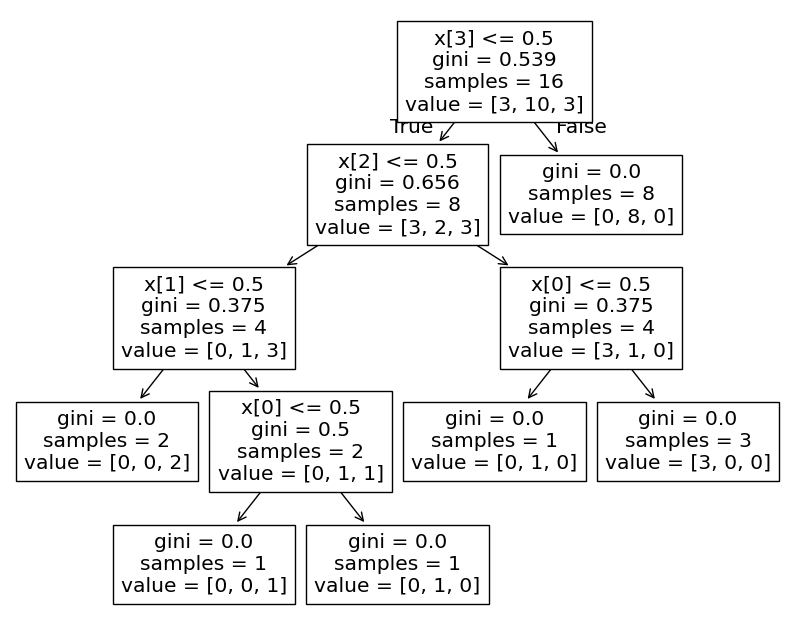

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(clf)
plt.show()

In [ ]:
print(y_Pred)

[1 1 1 1 1 1 2 0]


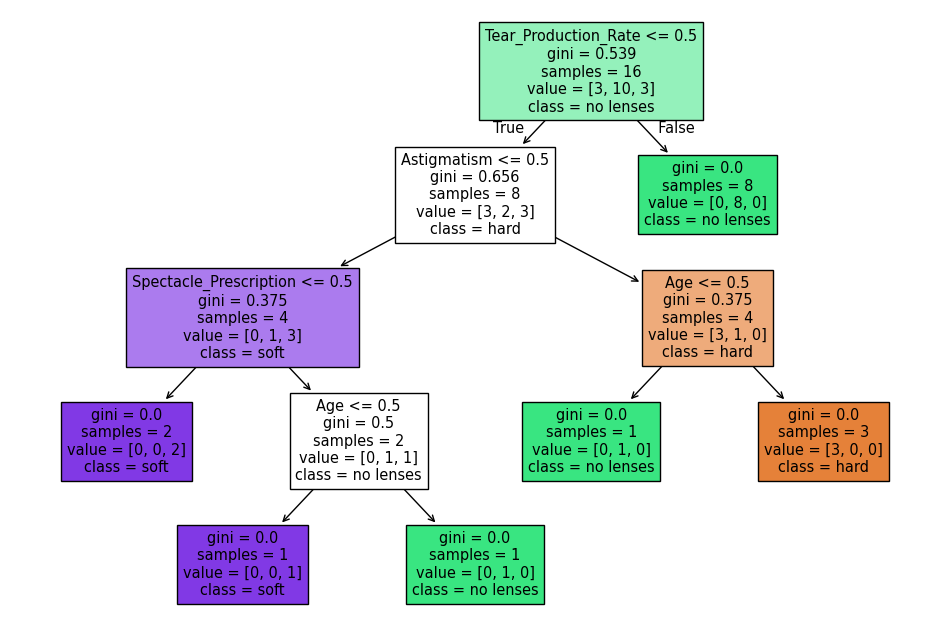

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(clf,
          feature_names=df.columns[:-1],  # all except target column
          class_names=encoders['Class'].classes_,
          filled=True)
plt.show()

Nave Bayes

In [ ]:
import seaborn as sns;sns.set()

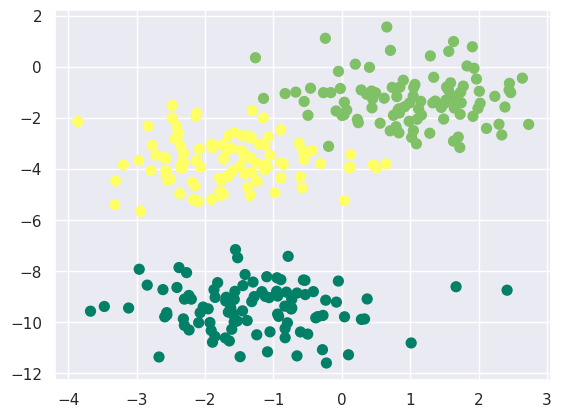

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=3, random_state=2, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X, y);

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GNB.predict(Xnew)

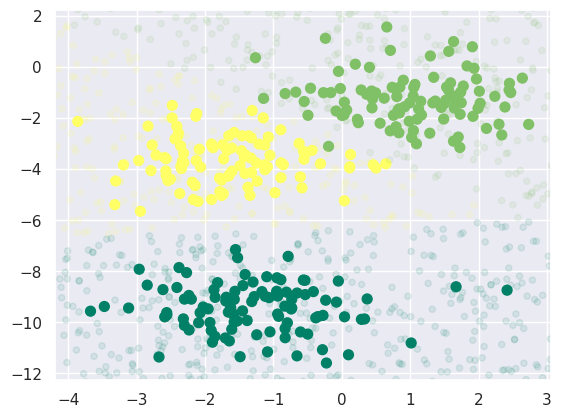

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='summer', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model_GNB.predict_proba(Xnew)
yprob[-10:].round(3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.737, 0.   , 0.263],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ]])

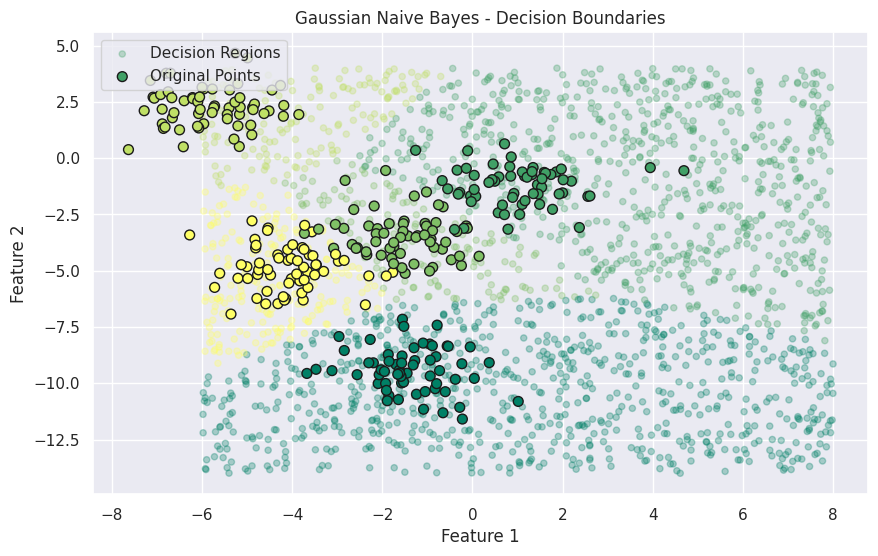

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

# Generate data
X, y = make_blobs(300, 2, centers=5, random_state=2, cluster_std=0.9)

# Fit model
model_GNB = GaussianNB()
model_GNB.fit(X, y)

# Generate grid of points
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GNB.predict(Xnew)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, alpha=0.3, cmap='summer', s=20, label='Decision Regions')

# Overlay original data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer', edgecolor='k', label='Original Points')
plt.legend()
plt.title("Gaussian Naive Bayes - Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()